In [24]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [9]:
data = pd.read_csv('桃園市親子館名冊.csv')
data.head()

,館名,地址,連絡電話,服務時間,服務對象,服務內容
0,桃園市桃園親子館,桃園市桃園區三民路一段200號,03 3398607,週二至週日（早上8:30~17:30）(每週一及國定假日休館),6歲以下(國小一年級前，不含一年級)之學齡前兒童及其照顧者。,1.育兒資源服務：親子互動遊戲區、親子活動、親職講座、教玩具及圖書外借服務、家長支持團體、外...
1,桃園市大園親子館（含行動親子車）,桃園市大園區和平東路89號3樓,03 3863316分機41-46,週二至週日（早上8:30~17:30）(每週一及國定假日休館),6歲以下(國小一年級前，不含一年級)之學齡前兒童及其照顧者。,1.育兒資源服務：親子互動遊戲區、親子活動、親職講座、教玩具及圖書外借服務、家長支持團體、外...
2,桃園市平鎮親子館（含行動親子車）,桃園市平鎮區廣成街10號4樓,03 4921366,週二至週日（早上8:30~17:30）(每週一及國定假日休館),6歲以下(國小一年級前，不含一年級)之學齡前兒童及其照顧者。,1.育兒資源服務：親子互動遊戲區、親子活動、親職講座、教玩具及圖書外借服務、家長支持團體、外...
3,桃園市中壢親子館,桃園市中壢區元化路159號4樓 (中壢社福館4樓),03 4251620,週二至週日（早上8:30~17:30）(每週一及國定假日休館),6歲以下(國小一年級前，不含一年級)之學齡前兒童及其照顧者。,1.育兒資源服務：親子互動遊戲區、親子活動、親職講座、教玩具及圖書外借服務、家長支持團體、外...
4,桃園市八德親子館,桃園市八德區福國北街220號2樓,03 3766220,週二至週日（早上8:30~17:30）(每週一及國定假日休館),6歲以下(國小一年級前，不含一年級)之學齡前兒童及其照顧者。,1.育兒資源服務：親子互動遊戲區、親子活動、親職講座、教玩具及圖書外借服務、家長支持團體、外...


In [12]:
data['seg'] = ""

jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in data['服務內容']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    data['seg'].iloc[index] = seg_list
    index += 1

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\asus\AppData\Local\Temp\jieba.cache
Loading model cost 0.582 seconds.
Prefix dict has been built successfully.


In [13]:
data['seg']

0     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
1     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
2     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
3     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
4     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
5     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
6     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
7     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
8     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
9     [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
10    [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
11    [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
12    [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
13    [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
14    [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
15    [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
16    [服務, 資源, 社會, 育兒, 親子, 協助, 連結, 福利, 外借, 互動遊, 戲區, ...
17    [服務, 育兒, 資源, 親子, 協助, 連結, 互動, 空間, 詢服務, 活動, 

In [17]:
data_seg_list = data['seg'].tolist()
type(data_seg_list)

list

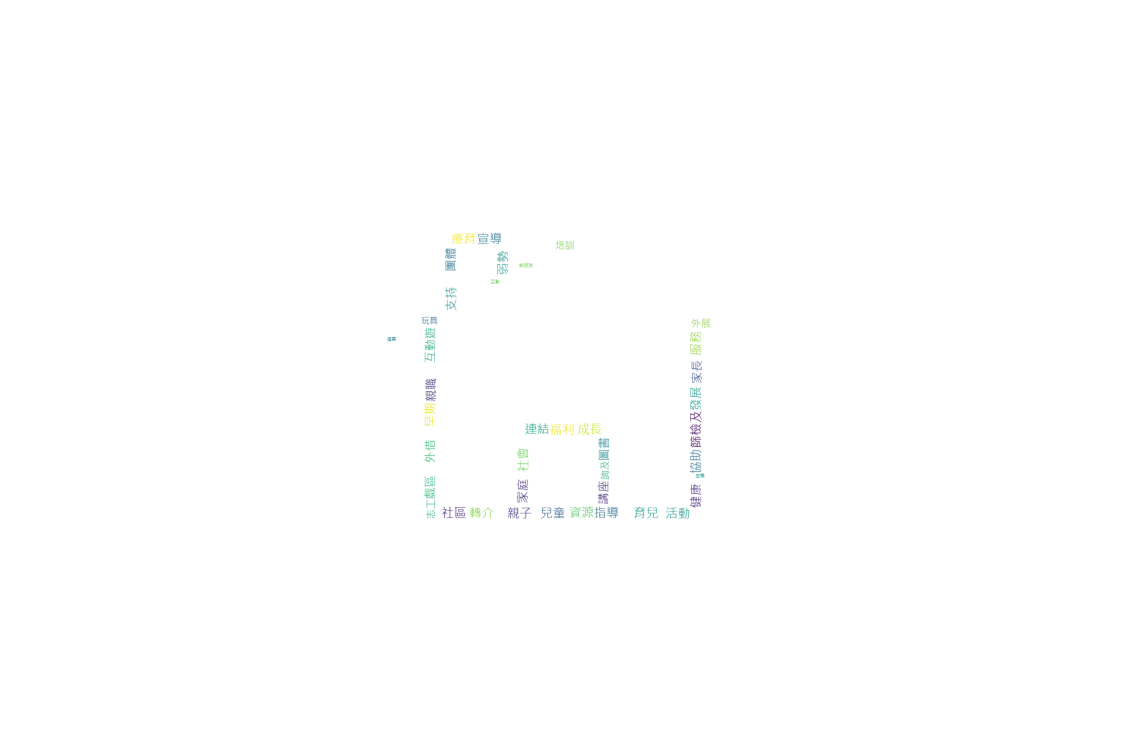

In [25]:
flat = [x for datalist in data_seg_list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("house.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)


plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()